# Finlandia e Pacific Bell Modificada, lambda 10

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon

n_simulacoes=50

medias={"dij_finlandia": [], "hop_finlandia": [], "lrw_finlandia": [],
       "dij_pacific_bell_modificada": [], "hop_pacific_bell_modificada": [], "lrw_pacific_bell_modificada": []}


In [103]:
    def imprime_graficos(data1,data2,data3,titulo):
        
        titulo+="erlang_30_60_90"
        data = [data1,data2, data3]        
        fig, ax = plt.subplots()
        ax.boxplot(data)
        ax.boxplot(data)
        
        plt.xticks([1, 2, 3], ['30', '60', '90'])

        ax.set_title(titulo)
        plt.savefig('novos_graficos/lambda_10/'+titulo+'.png') 
        plt.clf()


    def media(df):
        soma=0
        c=0
        for row in df.iterrows(): 
            if(c<n_simulacoes):soma+=row[1][0] 
            c+=1
        return soma/n_simulacoes    


# Algoritmo principal

In [104]:
lambda1="10"
topologias=["finlandia","pacific_bell_modificada"]
erlangs=["30","60","90"]
algoritimos=["dij","hop","lrw"]
for topologia in topologias:
    for algoritimo in algoritimos:
        dados=[]        
        for erlang in erlangs:
            xlsx = pd.ExcelFile('/home/wilson/Desktop/choji_topicos/trabalho_6/'+topologia+'/lambda_'+lambda1+'/erlang_'+erlang+'/'+algoritimo+'.xlsx')
            df = pd.read_excel(xlsx, 'Plan1')
            df.columns = ['media', 'asterisco']
            dados.append(df['media'])
            medias[algoritimo+"_"+topologia].append(media(df))
            
        imprime_graficos(dados[0],dados[1],dados[2],topologia+"_"+algoritimo+"_")
        
            


            

/home/wilson/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


## Tabela geral da Finlandia 

In [4]:
print("Tabela finlandia usando lambda "+lambda1+"\n|  |    Dij  |    Hop   |   Lrw    |")
for j in range(3):
    print("|%s|%.7f| %.7f| %.7f|"%(erlangs[j],medias["dij_finlandia"][j],medias["hop_finlandia"][j],medias["lrw_finlandia"][j]))

Tabela finlandia usando lambda 10
|  |    Dij  |    Hop   |   Lrw    |
|30|0.7939444| 0.8668979| 0.9477517|
|60|0.6388040| 0.7173742| 0.8006814|
|90|0.3893019| 0.4452773| 0.5437241|


## Gráfico da Finlandia


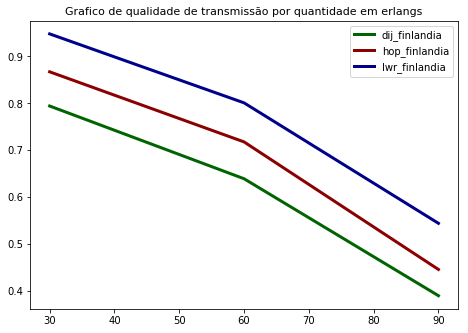

In [5]:
plt.clf()
plt.plot([30,60,90],medias["dij_finlandia"], linestyle='-', color='darkgreen',linewidth=3.0,label="dij_finlandia")
plt.plot([30,60,90],medias["hop_finlandia"], linestyle='-', color='darkred', linewidth=3.0,label="hop_finlandia")
plt.plot([30,60,90],medias["lrw_finlandia"], linestyle='-', color='darkblue',linewidth=3.0,label="lwr_finlandia")

plt.title("Grafico de qualidade de transmissão por quantidade em erlangs",fontsize=11)
plt.legend()
plt.show()

## Tabela geral da Pacific

In [6]:
print("Tabela pacific_bell_modificada usando lambda "+lambda1+" \n|  |    Dij  |    Hop   |   Lrw    |")
for j in range(3):
    print("|%s|%.7f| %.7f| %.7f|"%(erlangs[j],medias["dij_pacific_bell_modificada"][j],medias["hop_pacific_bell_modificada"][j],medias["lrw_pacific_bell_modificada"][j]))

Tabela pacific_bell_modificada usando lambda 10 
|  |    Dij  |    Hop   |   Lrw    |
|30|0.8172865| 0.7798204| 0.8811947|
|60|0.4232786| 0.3757682| 0.5236970|
|90|0.3615794| 0.3239195| 0.4708199|


## Gráfico da Pacific

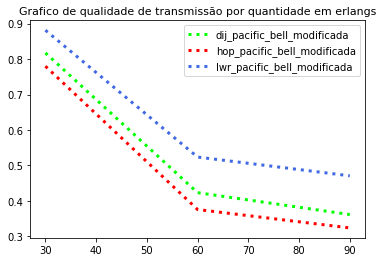

In [7]:
plt.plot([30,60,90],medias["dij_pacific_bell_modificada"], linestyle=':', color='lime',linewidth=3.0,label="dij_pacific_bell_modificada")
plt.plot([30,60,90],medias["hop_pacific_bell_modificada"], linestyle=':', color='red', linewidth=3.0,label="hop_pacific_bell_modificada")
plt.plot([30,60,90],medias["lrw_pacific_bell_modificada"], linestyle=':', color='royalblue',linewidth=3.0,label="lwr_pacific_bell_modificada")
plt.title("Grafico de qualidade de transmissão por quantidade em erlangs",fontsize=11)
plt.legend()
plt.show()

## Gráfico Geral

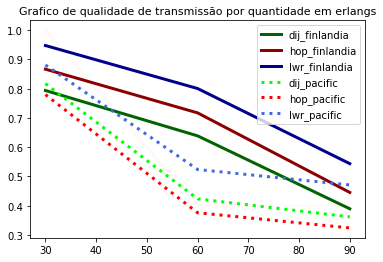

In [8]:

plt.plot([30,60,90],[1,.4,.4], color='snow',linewidth=3.0)
plt.plot([30,60,90],medias["dij_finlandia"], linestyle='-', color='darkgreen',linewidth=3.0,label="dij_finlandia")
plt.plot([30,60,90],medias["hop_finlandia"], linestyle='-', color='darkred', linewidth=3.0,label="hop_finlandia")
plt.plot([30,60,90],medias["lrw_finlandia"], linestyle='-', color='darkblue',linewidth=3.0,label="lwr_finlandia")

plt.plot([30,60,90],medias["dij_pacific_bell_modificada"], linestyle=':', color='lime',linewidth=3.0,label="dij_pacific")
plt.plot([30,60,90],medias["hop_pacific_bell_modificada"], linestyle=':', color='red', linewidth=3.0,label="hop_pacific")
plt.plot([30,60,90],medias["lrw_pacific_bell_modificada"], linestyle=':', color='royalblue',linewidth=3.0,label="lwr_pacific")
plt.title("Grafico de qualidade de transmissão por quantidade em erlangs",fontsize=11)
plt.legend()


plt.show()